<a href="https://colab.research.google.com/github/austinlasseter/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/232_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets 
- Explore tabular data for supervised machine learning
- Join relational data for supervised machine learning

### A note in preparation for Unit 3

When you're doing your initial data exploration, you're educating yourself about the data, assessing data integrity, and formulating a plan of attack for your predictive model.

The best answer to any of these questions may vary from dataset to dataset. *Experiment* with a simple model to help you through the exploratory data analysis phase.

#### Meaningful Variation
  - Are there any features that are simply constant or quasi-constant values? 
  - Duplicated features?
  - Duplicated rows?
  - Are any of your features highly correlated together?
    - Linear models can be particularly sensitive to multi-collinearity.
    - Larger (esp. wide) datasets tend to have redundant features.

#### Categorical Encodings

  - What are your high cardinality categories?
  - Are there any rare labels that might benefit from grouping together?
  - Are there any categories that could be transformed into a meaningful rank (custom ordinal encoding)?

#### Distributions

  - What are the frequencies of your categorical labels?
  - Is your target feature normally distributed? (Assumption for linear regression model)

#### Outliers
  - How sensitive is your model type to outliers?
    - Less sensitive models include tree-based models. 
    - Linear models, neural networks, and other distance-based models will almost always benefit from scaling.
  - What strategy will you use to identify and handle outliers?

#### Feature Selection

  Why should we reduce the number of features?
  - Reduces potential overfitting
  - Fewer features -> easier interpretation for your stakeholders.
  - Easier implementation and maintain by software engineers.
  - Reduced computational resource requirement.

#### Reproducibility

  - Always set a random seed.
  - Comment, comment, comment!
  - Print out versions of your software.
  - Implement version control for your *data* as well as your *code* (esp. with timestamps!)
  - Wrap your code in reproducible functions / classes for modularity of steps, including feature loading, data wrangling, feature processing, etc. (i.e., *use sklearn pipelines!*)
  - Combine your modularized functions / classes in a single, centralized pipeline to execute your modularized 
  - Print out / record your final model parameters (optimized hyperparameter values).
  - Record other details of the model: final features passed in, transformations employed, etc.(Jupyter makes this very transparent, but long notebooks can be more confusing than long-form scripts. 

# Explore tabular data for supervised machine learning 🍌

Wrangling your dataset is often the most challenging and time-consuming part of the modeling process.

In today's lesson, we’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

Let’s get set up:


In [1]:
!wget https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip

--2020-10-01 23:50:21--  https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip [following]
--2020-10-01 23:50:21--  https://www.dropbox.com/s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3497d6f165cdfda7aa6134476e.dl.dropboxusercontent.com/cd/0/inline/BAdQr6lNCZGGpNE4d1ZI_SQK4DuP0mFdCtkSKCF66s0znrxqSqMPm2b0D8mWXAjlFUWQY9rjvDTPrA_IYGYzvljhIsJqjbCKlCovebA5Z3k9Za80-PzIPQDLgjGvrnY12Ik/file# [following]
--2020-10-01 23:50:22--  https://uc3497d6f165cdfda7aa6134476e.dl.dropboxusercontent.com/cd/0/inline/BAdQr6lNCZGGpNE4d1ZI_SQK4DuP0mFdCtkSKCF66s

In [2]:
!unzip instacart-market-basket-analysis.zip

Archive:  instacart-market-basket-analysis.zip
   creating: instacart-market-basket-analysis/
  inflating: __MACOSX/._instacart-market-basket-analysis  
  inflating: instacart-market-basket-analysis/order_products__prior.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__prior.csv.zip  
  inflating: instacart-market-basket-analysis/.DS_Store  
  inflating: __MACOSX/instacart-market-basket-analysis/._.DS_Store  
  inflating: instacart-market-basket-analysis/order_products__train.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__train.csv.zip  
  inflating: instacart-market-basket-analysis/aisles.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._aisles.csv.zip  
  inflating: instacart-market-basket-analysis/orders.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._orders.csv.zip  
  inflating: instacart-market-basket-analysis/departments.csv.zip  
  inflating: __MACOSX/instacart-market-baske

In [4]:
# Change directory to where the data was uncompressed
%cd instacart-market-basket-analysis
import os
print(os.getcwd())

[Errno 2] No such file or directory: 'instacart-market-basket-analysis'
/content/instacart-market-basket-analysis
/content/instacart-market-basket-analysis


In [5]:
# print files in direc

os.listdir()

['order_products__train.csv.zip',
 'orders.csv.zip',
 'order_products__prior.csv.zip',
 'aisles.csv.zip',
 '.DS_Store',
 'departments.csv.zip',
 'products.csv.zip']

In [10]:
# unzip each of those files and move it to the current working directly
import zipfile
import shutil
from glob import glob

def get_those_files(filename):
  with zipfile.ZipFile(filename+'.csv.zip','r') as zip_ref:
      zip_ref.extractall(filename)
  shutil.move(filename+"/"+filename+".csv", filename+".csv")

for filename in ['aisles', 'departments', 'order_products__prior', 'order_products__train', 'orders', 'products']:
  get_those_files(filename)

# Print the csv filenames

for filename in glob('*.csv'):
  print (filename)

### For each csv file, look at its shape & head 

In [12]:
import pandas as pd
from IPython.display import display


def preview():
  for filename in glob('*.csv'):
    df = pd.read_csv(filename)
    print ('\n',filename, df.shape)
    display(df.head())

preview()


 order_products__train.csv (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



 order_products__prior.csv (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



 orders.csv (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



 aisles.csv (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



 departments.csv (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



 products.csv (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## The original task was complex ...

[The Kaggle competition said,](https://www.kaggle.com/c/instacart-market-basket-analysis/data):

> The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order.

> orders.csv: This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders.

Each row in the submission is an order_id from the test set, followed by product_id(s) predicted to be reordered.

> sample_submission.csv: 
```
order_id,products
17,39276 29259
34,39276 29259
137,39276 29259
182,39276 29259
257,39276 29259
```

## ... but we can simplify!

Simplify the question, from "Which products will be reordered?" (Multi-class, [multi-label](https://en.wikipedia.org/wiki/Multi-label_classification) classification) to **"Will customers reorder this one product?"** (Binary classification)

Which product? How about **the most frequently ordered product?**

# Questions:

- What is the most frequently ordered product?
- How often is this product included in a customer's next order?
- Which customers have ordered this product before?
- How can we get a subset of data, just for these customers?
- What features can we engineer? We want to predict, will these customers reorder this product on their next order?

## What was the most frequently ordered product?

In [ ]:
order_products__train = pd.read_csv('order_products__train.csv')

In [ ]:
order_products__train['product_id'].value_counts()

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
44256        1
2764         1
4815         1
43736        1
46835        1
Name: product_id, Length: 39123, dtype: int64

In [ ]:
temp = order_products__train.sort_values(by='product_id', ascending=False).head()
temp
temp.shape

(5, 4)

In [ ]:
order_products__train.shape

(1384617, 4)

In [ ]:
products = pd.read_csv("products.csv")
products.head()
products.shape

(49688, 4)

In [ ]:
train = pd.merge(order_products__train, products, how='inner', left_on='product_id', right_on='product_id')

In [ ]:
train['product_name'].value_counts()

Banana                                    18726
Bag of Organic Bananas                    15480
Organic Strawberries                      10894
Organic Baby Spinach                       9784
Large Lemon                                8135
                                          ...  
Organic Maple Sugar                           1
Dark Chocolate Bar 68% Cacao                  1
Home Menu Signature Pork Dumplings            1
Organic French Roast Whole Bean Coffee        1
Organic Sprouted Wheat Flour                  1
Name: product_name, Length: 39123, dtype: int64

[link text](https://)## How often is this product included in a customer's next order?

There are [three sets of data](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b):

> "prior": orders prior to that users most recent order (3.2m orders)  
"train": training data supplied to participants (131k orders)  
"test": test data reserved for machine learning competitions (75k orders)

Customers' next orders are in the "train" and "test" sets. (The "prior" set has the orders prior to the most recent orders.)

We can't use the "test" set here, because we don't have its labels (only Kaggle & Instacart have them), so we don't know what products were bought in the "test" set orders.

So, we'll use the "train" set. It currently has one row per product_id and multiple rows per order_id.

But we don't want that. Instead we want one row per order_id, with a binary column: "Did the order include the product?"

Let's wrangle!

In [ ]:
train.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


In [ ]:
train['bananas'] = train['product_name'] == 'Banana'

In [ ]:

# Of banana orders, how many are re-orders?
# bananas = train[train['product_name'] == 'Banana']
# bananas['reordered'].value_counts(normalize=True)

In [ ]:
# How often is this product (i.e., bananas) included in the customer's next order?
train['bananas'].value_counts(normalize=True)

False    0.986476
True     0.013524
Name: bananas, dtype: float64

In [ ]:
# How often is this product (i.e., bananas) included in the customer's next order?

train_wrangled = train.groupby('order_id')['bananas'].any().reset_index()
train_wrangled

,order_id,bananas
0,1,False
1,36,False
2,38,False
3,96,False
4,98,False
...,...,...
131204,3421049,False
131205,3421056,False
131206,3421058,False
131207,3421063,False


In [ ]:
# orders.head()
orders = orders.loc[orders['days_since_prior_order'] != 0]


In [ ]:
# train2 = pd.merge(train, orders, how='inner', left_on='order_id', right_on='order_id')
# train2['order_hour_of_day'].value_counts(normalize=True)

In [ ]:
train_wrangled['bananas'].value_counts(normalize=True)

False    0.857281
True     0.142719
Name: bananas, dtype: float64

In [ ]:
# What is the most common hour of the day that bananas are ordered?
# What is the most common hour of the day for any food orders?

import numpy as np

train[train['bananas']]

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,bananas
129688,226,24852,2,0,Banana,24,4,True
129689,473,24852,2,0,Banana,24,4,True
129690,878,24852,2,1,Banana,24,4,True
129691,1042,24852,1,1,Banana,24,4,True
129692,1139,24852,1,1,Banana,24,4,True
...,...,...,...,...,...,...,...,...
148409,3419531,24852,2,1,Banana,24,4,True
148410,3419542,24852,6,0,Banana,24,4,True
148411,3419629,24852,5,1,Banana,24,4,True
148412,3420088,24852,9,1,Banana,24,4,True


# Join relational data for supervised machine learning

## Overview
Often, you’ll need to join data from multiple relational tables before you’re ready to fit your models.

## Which customers have ordered bananas before?

- Customers are identified by `user_id`
- Products are identified by `product_id`

Do we have a table with both these id's? 

(If not, how can we combine this information?)

No, we don't have a table with both these id's. But:
- `orders.csv` has `user_id` and `order_id`
- `order_products__prior.csv` has `order_id` and `product_id`
- `order_products__train.csv` has `order_id` and `product_id` too



In [ ]:
banana_order_ids = train[train.bananas==True].order_id

In [ ]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders[orders.order_id.isin(banana_order_ids)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
25,1492625,2,train,15,1,11,30.0
485,698604,34,train,6,4,13,30.0
623,1864787,43,train,12,5,11,26.0
652,1947848,46,train,20,4,20,11.0
881,13318,56,train,13,1,9,6.0
...,...,...,...,...,...,...,...
3420581,681092,206181,train,15,1,13,30.0
3420692,2530125,206191,train,6,0,9,30.0
3420786,3383615,206196,train,5,0,15,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [ ]:
# orders1 = orders[orders.order_id.isin(banana_order_ids)]
# user_id.isin(orders1).value_counts()  

In [ ]:
# Which unique user_ids bought bananas?
# orders[orders.order_id.isin(banana_order_ids)]['user_id'].value_counts()


In [ ]:
# What is the most common hour of the day that bananas are ordered?
# What is the most common hour of the day for any food orders?

## How can we get a subset of data, just for these customers?

We want *all* the orders from customers who have *ever* bought the product.

(And *none* of the orders from customers who have *never* bought the product.)

## What features can we engineer? We want to predict, will these customers reorder bananas on their next order?

- Products per order
- Time of day
- Have they reordered bananas before? (Have ordered bananas >= 2 times)
- Other fruit they buy 
- Size of orders (customers with smaller orders on average are less likely to be reordering any particular product on their next order)


- Frequency of banana orders:
    - % of orders 
    - Time between banana orders: Every n days on average
    - Raw count: Total orders, how many times have you ordered bananas?

- Recency of banana orders
    - n days since you ordered banana




In [ ]:
# Is there a difference in average order size in banana-containing orders vs. all orders?

In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
 banana_order_ids

129688        226
129689        473
129690        878
129691       1042
129692       1139
           ...   
148409    3419531
148410    3419542
148411    3419629
148412    3420088
148413    3420996
Name: order_id, Length: 18726, dtype: int64

In [ ]:
# Group by order_id, counts unique product (one unique per row in train dataframe), and prints out count of unique rows (products) per order
product_order_counts = train.groupby(['order_id']).count()['product_id']
product_order_counts.mean()


10.552759338155157

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


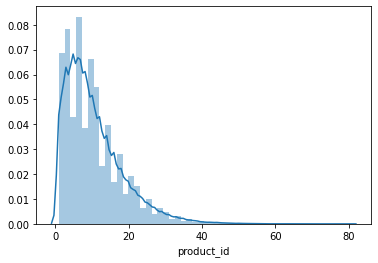

In [ ]:
import seaborn as sns
sns.distplot(product_order_counts)

In [ ]:
banana_order_counts = train[train.order_id.isin(banana_order_ids)].groupby(['order_id']).count()['product_id']
banana_order_counts.mean()


14.977517889565311

## Challenge

**Continue to clean and explore your data.** Can you **engineer features** to help predict your target? For the evaluation metric you chose, what score would you get just by guessing? Can you **make a fast, first model** that beats guessing?

We recommend that you use your portfolio project dataset for all assignments this sprint. But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset today. Follow the instructions in the assignment notebook. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!